### 06 Trees Homework

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer # to do one hot encoding
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

#### Downloading the data

!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

In [3]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [4]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
df.describe()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.000000,9222.000000,8996.000000,9704.000000,8774.000000,9704.000000,9202.000000,9704.000000
mean,199.708368,3.962481,149.657292,3001.280993,15.021928,2011.484027,-0.006412,14.985243
std,49.455319,1.999323,29.879555,497.894860,2.510339,6.659808,1.048162,2.556468
min,10.000000,0.000000,37.000000,952.681761,6.000000,2000.000000,-4.000000,6.200971
25%,170.000000,3.000000,130.000000,2666.248985,13.300000,2006.000000,-1.000000,13.267459
50%,200.000000,4.000000,149.000000,2993.226296,15.000000,2012.000000,0.000000,15.006037
75%,230.000000,5.000000,170.000000,3334.957039,16.700000,2017.000000,1.000000,16.707965
max,380.000000,13.000000,271.000000,4739.077089,24.300000,2023.000000,4.000000,25.967222


In [6]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

### Preparing the dataset
Preparation:

- Fill missing values with zeros.
- Do train/validation/test split with 60%/20%/20% distribution.
- Use the train_test_split function and set the random_state parameter to 1.
- Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [7]:
df = df.fillna(0)

In [8]:
df.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [9]:
df.describe()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.000000,9704.000000,9704.000000,9704.000000,9704.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,3.765664,138.738355,3001.280993,13.582275,2011.484027,-0.006080,14.985243
std,49.455319,2.130715,48.401189,497.894860,5.025294,6.659808,1.020689,2.556468
min,10.000000,0.000000,0.000000,952.681761,0.000000,2000.000000,-4.000000,6.200971
25%,170.000000,2.000000,124.000000,2666.248985,12.600000,2006.000000,-1.000000,13.267459
50%,200.000000,4.000000,146.000000,2993.226296,14.700000,2012.000000,0.000000,15.006037
75%,230.000000,5.000000,168.000000,3334.957039,16.500000,2017.000000,1.000000,16.707965
max,380.000000,13.000000,271.000000,4739.077089,24.300000,2023.000000,4.000000,25.967222


In [10]:
df[df.num_doors==-4]

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
1831,190,4.0,149.0,2881.153070,15.8,2020,Asia,Diesel,All-wheel drive,-4.0,16.003926
4574,180,7.0,149.0,2821.060744,15.3,2010,USA,Gasoline,All-wheel drive,-4.0,15.997741
5880,110,7.0,183.0,2638.381775,16.0,2020,Asia,Gasoline,Front-wheel drive,-4.0,17.289839
9411,110,2.0,0.0,2276.397718,14.9,2016,USA,Diesel,Front-wheel drive,-4.0,18.623592


In [11]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df, test_size = 0.25, random_state=1)

In [12]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [13]:
y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']
y_test = df_test['fuel_efficiency_mpg']

In [14]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [15]:
df_train.describe()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors
count,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000
mean,199.755427,3.773839,138.639736,3004.927956,13.528401,2011.466612,0.000412
std,49.559229,2.122461,48.006921,495.955752,5.051797,6.681257,1.020405
min,10.000000,0.000000,0.000000,1066.328301,0.000000,2000.000000,-4.000000
25%,170.000000,2.000000,123.000000,2669.401766,12.600000,2006.000000,-1.000000
50%,200.000000,4.000000,146.000000,2995.377418,14.700000,2011.000000,0.000000
75%,230.000000,5.000000,168.000000,3339.245245,16.400000,2017.000000,1.000000
max,380.000000,13.000000,252.000000,4739.077089,23.800000,2023.000000,4.000000


In [16]:
train_dicts = df_train.to_dict(orient='records')

In [17]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [18]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [19]:
dv.get_feature_names_out()

array(['acceleration', 'drivetrain=All-wheel drive',
       'drivetrain=Front-wheel drive', 'engine_displacement',
       'fuel_type=Diesel', 'fuel_type=Gasoline', 'horsepower',
       'model_year', 'num_cylinders', 'num_doors', 'origin=Asia',
       'origin=Europe', 'origin=USA', 'vehicle_weight'], dtype=object)

#### Question 1
Let's train a decision tree regressor to predict the fuel_efficiency_mpg variable.

- Train a model with max_depth=1.

In [20]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [21]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- vehicle_weight <= 3025.74
|   |--- value: [16.86]
|--- vehicle_weight >  3025.74
|   |--- value: [12.88]



The feature used for splitting the data is **vehicle_weight**

#### Question 2
Train a random forest regressor with these parameters:

- n_estimators=10
- random_state=1
- n_jobs=-1 (optional - to make training faster)

In [22]:
def rmse(y, y_pred):
    se = (y-y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [23]:
rf = RandomForestRegressor(n_estimators=10, 
                            random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
y_pred = rf.predict(X_val)

In [25]:
rmse(y_val, y_pred)

np.float64(0.4504808576989446)

The RMSE on validation dataset is **0.45**

### Question 3
Now let's experiment with the n_estimators parameter

- Try different values of this parameter from 10 to 200 with step 10.
- Set random_state to 1.
- Evaluate the model on the validation dataset.

In [26]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse_score = rmse(y_val, y_pred)
    scores.append((n, rmse_score))

In [27]:
df_scores = pd.DataFrame(scores, columns = ['n_estimators', 'rmse'])
df_scores

,n_estimators,rmse
0,10,0.450481
1,20,0.439715
2,30,0.434746
3,40,0.432494
4,50,0.431264
5,60,0.429801
6,70,0.428638
7,80,0.427319
8,90,0.426928
9,100,0.426402


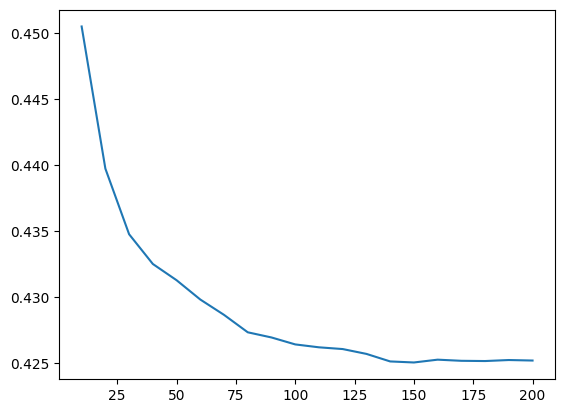

In [28]:
plt.plot(df_scores.n_estimators, df_scores.rmse)

Looks like around **n_estimators=80** is when the RMSE stop improving

### Question 4
Let's select the best max_depth:

- Try different values of max_depth: [10, 15, 20, 25]
- For each of these values,
    - try different values of n_estimators from 10 till 200 (with step 10)
    - calculate the mean RMSE
- Fix the random seed: random_state=1

In [29]:
scores = []


for d in [10, 15, 20, 25]:
    mean_rmse = []
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse_score = rmse(y_val, y_pred)
        mean_rmse.append(rmse_score)
    m_rmse = np.average(rmse_score)
    scores.append((d, rmse_score))

In [30]:
columns = ['max_depth', 'mean_rmse']
df_scores = pd.DataFrame(scores, columns = columns)
df_scores.head()

,max_depth,mean_rmse
0,10,0.423994
1,15,0.425458
2,20,0.425427
3,25,0.425229


In [31]:
df_scores[df_scores.mean_rmse == max(df_scores.mean_rmse)]

,max_depth,mean_rmse
1,15,0.425458


Best max_depth, using the mean RMSE is **max_depth=15**

### Question 5
We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

- Train the model with these parameters:
    - n_estimators=10,
    - max_depth=20,
    - random_state=1,
    - n_jobs=-1 (optional)
- Get the feature importance information from this model

In [37]:
rf = RandomForestRegressor(n_estimators=10,
                            max_depth=20,
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
feature_names = dv.get_feature_names_out()

In [39]:
importances = rf.feature_importances_

In [40]:
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print(feature_importance_df)

                         feature  importance
13                vehicle_weight    0.959322
6                     horsepower    0.015253
0                   acceleration    0.011934
7                     model_year    0.003434
3            engine_displacement    0.003334
8                  num_cylinders    0.002259
9                      num_doors    0.001623
11                 origin=Europe    0.000627
12                    origin=USA    0.000488
10                   origin=Asia    0.000459
1     drivetrain=All-wheel drive    0.000338
5             fuel_type=Gasoline    0.000322
4               fuel_type=Diesel    0.000313
2   drivetrain=Front-wheel drive    0.000293


**vehicle_weight** with an importance of **0.959322** seems to be the Most Important feature

### Question 6
Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

- Install XGBoost
- Create DMatrix for train and validation
- Create a watchlist
- Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

In [42]:
features = dv.get_feature_names_out()
features = [str(item) for item in features] 
features

['acceleration',
 'drivetrain=All-wheel drive',
 'drivetrain=Front-wheel drive',
 'engine_displacement',
 'fuel_type=Diesel',
 'fuel_type=Gasoline',
 'horsepower',
 'model_year',
 'num_cylinders',
 'num_doors',
 'origin=Asia',
 'origin=Europe',
 'origin=USA',
 'vehicle_weight']

In [43]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

#### eta = 0.3

In [45]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100)
y_pred = model.predict(dval)
rmse(y_val, y_pred)

np.float64(0.4409670017887401)

#### eta = 0.1

In [46]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100)
y_pred = model.predict(dval)
rmse(y_val, y_pred)

np.float64(0.41504770600995405)

**eta = 0.1** gives a lower error as compared to the two 